In [1]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

import catrace.exp_collection as ecl
import catrace.dimensionality_reduction as catdr
import catrace.process_time_trace as ptt 

from os.path import join as pjoin
from catrace.dataset import load_dataset_config

2025-12-11 19:40:40.473896: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
dataset_name = 'juvenile'
config_file = '../dataset_configs/juvenile_dataset.json'
# #dataset_name = 'juvenile_dfovf'
# #dataset_name = 'juvenile_noise_std0p2'
# dataset_name = 'juvenile_noise_std0p5'
# config_file = f'../../{dataset_name}_dataset/notebooks/{dataset_name}_dataset.json'


from analysis_config import juvenile_window_name_to_frames
#window_name = 'time_window_3s'
window_name = 'time_window_5s'
#window_name = 'time_window_7s'
window = juvenile_window_name_to_frames[window_name]
print(window_name, window)
window_tag = f'window_{window[0]}to{window[1]}'

import os
fig_dir = f'../figures/{dataset_name}/{window_name}/umap'
os.makedirs(fig_dir, exist_ok=True)

time_window_3s [38, 63]


In [3]:
dsconfig= load_dataset_config(config_file)
umap_dir = pjoin(dsconfig.processed_trace_dir, 'umap', window_tag)
os.makedirs(umap_dir, exist_ok=True)

In [4]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['ps.fonttype'] = 42
rcParams['ps.useafm'] = True
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5
rcParams['savefig.dpi'] = 300  # Ensure a high resolution

In [5]:

exp_list = dsconfig.exp_list
trace_dir = dsconfig.processed_trace_dir
in_dir = trace_dir
dff = ecl.concatenate_df_from_db(in_dir, exp_list)
dff = ptt.select_odors_df(dff, dsconfig.odors_stimuli)
dff = ptt.sort_odors(dff, dsconfig.odors_stimuli)
dff = ptt.select_time_points(dff, window)

all_traces_df = dff

2021-07-15-DpOBEM-N2_Dp None
2021-07-16-DpOBEM-N3_Dp None
2021-12-10-DpOBEM-N4_Dp None
2021-12-31-DpOBEM-N7_Dp None
2022-02-13-DpOBEM-N10_Dp None
2022-02-20-DpOBEM-N11_Dp None
2021-02-05-DpOBEM-JH9_Dp None


2021-03-18-DpOBEM-JH10_Dp None
2021-03-19-DpOBEM-JH10_Dp None
2021-04-02-DpOBEM-JH11_Dp None
2021-04-03-DpOBEM-JH11_Dp None
2021-05-01-DpOBEM-JH13_Dp None
2021-05-22-DpOBEM-JH14_Dp None
2021-09-15-DpOBEM-JH20_Dp None
2021-09-17-DpOBEM-JH20_Dp None
2021-09-18-DpOBEM-JH20_Dp None
2021-07-30-DpOBEM-JH17_Dp None
2021-07-31-DpOBEM-JH17_Dp None
2021-09-02-DpOBEM-JH18_Dp None
2021-09-03-DpOBEM-JH18_Dp None
2021-09-04-DpOBEM-JH18_Dp None
2021-09-29-DpOBEM-JH21_Dp None
2021-10-01-DpOBEM-JH21_Dp None
2021-10-02-DpOBEM-JH21_Dp None
2021-10-14-DpOBEM-JH22_Dp None
2021-11-10-DpOBEM-JH23_Dp None
2021-11-11-DpOBEM-JH23_Dp None
2021-11-14-DpOBEM-JH23_Dp None
2021-11-24-DpOBEM-JH24_Dp None
2021-11-27-DpOBEM-JH24_Dp None
2021-11-26-DpOBEM-JH24_Dp None


In [6]:
# Compute UMAP embeddings for each condition
from tqdm import tqdm
importlib.reload(catdr)

umap_params = dict(output_metric='euclidean',
                   n_neighbors=70,
                   min_dist=0.6,
                   n_components=2,
                   random_state=24)
if dataset_name == 'juvenile_dfovf':
    umap_params['n_neighbors'] = 100
    umap_params['min_dist'] = 0.8
    umap_params['random_state'] = 51
processed_results = {name: catdr.compute_umap(group, umap_params, scale=False, return_model=True) for name, group in tqdm(dff.groupby(level='condition', axis=1, sort=False))}

processed_dfs = {name: result[0] for name, result in processed_results.items()}
umap_models = {name: result[1] for name, result in processed_results.items()}

/tmp/ipykernel_897189/340979825.py:14: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  processed_results = {name: catdr.compute_umap(group, umap_params, scale=False, return_model=True) for name, group in tqdm(dff.groupby(level='condition', axis=1, sort=False))}
  0%|          | 0/4 [00:00<?, ?it/s]/tungstenfs/scratch/gfriedri/hubo/Software/python_env/catrace_cpu/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


 25%|██▌       | 1/4 [00:08<00:26,  8.93s/it]/tungstenfs/scratch/gfriedri/hubo/Software/python_env/catrace_cpu/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
 50%|█████     | 2/4 [00:11<00:09,  4.99s/it]/tungstenfs/scratch/gfriedri/hubo/Software/python_env/catrace_cpu/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
 75%|███████▌  | 3/4 [00:13<00:03,  3.69s/it]/tungstenfs/scratch/gfriedri/hubo/Software/python_env/catrace_cpu/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
100%|██████████| 4/4 [00:15<00:00,  3.77s/it]


In [7]:
# Save UMAP models and processed dfs
import pickle
os.makedirs(umap_dir, exist_ok=True)
for cond in processed_dfs.keys():
    model_path = pjoin(umap_dir, f'umap_model_{cond}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(umap_models[cond], f)
    
    df_path = pjoin(umap_dir, f'umap_processed_df_{cond}.pkl')
    processed_dfs[cond].to_pickle(df_path)

In [8]:
# Concatenate all the processed groups back together along columns (axis=1), and add 'cond' level
latent_df = pd.concat(processed_dfs, axis=1, keys=processed_dfs.keys())
latent_df.columns.names = ['condition', 'latent_dim']

In [9]:
import cebra.data
import catrace.scale as catsc
importlib.reload(catsc)
# Align the manifolds to naive

first_cond_name = 'naive'
first_cond = latent_df.xs(first_cond_name, level='condition', axis=1)

aligned_models = dict()
centering_models = dict()
aligned_latents = dict()
labels = np.arange(latent_df.shape[0])
for cond, subset in latent_df.groupby('condition', axis=1, sort=False):
    if cond == first_cond_name:
        aligned_latents[cond], centering_models[cond] = catsc.centering(subset.droplevel('condition', axis=1), return_model=True)
        aligned_models[cond] = None
    else:
        aligned_models[cond] = cebra.data.helper.OrthogonalProcrustesAlignment()
        aligned = aligned_models[cond].fit_transform(first_cond.to_numpy(), catsc.centering(subset).to_numpy(), labels, labels)
        _, centering_models[cond] = catsc.centering(subset, return_model=True)
        aligned_latents[cond] = catdr.get_embeddf(aligned, subset.index)

aligned_latent_df = pd.concat(aligned_latents, axis=1, keys=aligned_latents.keys())
aligned_latent_df.columns.names = ['condition', 'latent_dim']


/tmp/ipykernel_897189/2439255483.py:13: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  for cond, subset in latent_df.groupby('condition', axis=1, sort=False):


In [10]:
# Save centering models, aligned models and aligned latents
for cond in aligned_latents.keys():
    centering_model_path = pjoin(umap_dir, f'centering_model_{cond}.pkl')
    with open(centering_model_path, 'wb') as f:
        pickle.dump(centering_models[cond], f)

    model_path = pjoin(umap_dir, f'alignment_model_{cond}.pkl')
    with open(model_path, 'wb') as f:
        pickle.dump(aligned_models[cond], f)

    latents_path = pjoin(umap_dir, f'aligned_latents_{cond}.pkl')
    with open(latents_path, 'wb') as f:
        pickle.dump(aligned_latents[cond], f)

In [11]:
# Load UMAP models and processed dfs
import pickle
import pandas as pd
umap_models = {}
processed_dfs = {}
for cond in dsconfig.conditions:
    model_path = pjoin(umap_dir, f'umap_model_{cond}.pkl')
    with open(model_path, 'rb') as f:
        umap_models[cond] = pickle.load(f)
    
    df_path = pjoin(umap_dir, f'umap_processed_df_{cond}.pkl')
    processed_dfs[cond] = pd.read_pickle(df_path)

In [12]:
# Load aligned models and aligned latents
centering_models = {}
aligned_models = {}
aligned_latents = {}
for cond in dsconfig.conditions:
    centering_model_path = pjoin(umap_dir, f'centering_model_{cond}.pkl')
    with open(centering_model_path, 'rb') as f:
        centering_models[cond] = pickle.load(f)

    model_path = pjoin(umap_dir, f'alignment_model_{cond}.pkl')
    with open(model_path, 'rb') as f:
        aligned_models[cond] = pickle.load(f)
    
    latents_path = pjoin(umap_dir, f'aligned_latents_{cond}.pkl')
    with open(latents_path, 'rb') as f:
        aligned_latents[cond] = pickle.load(f)

aligned_latent_df = pd.concat(aligned_latents, axis=1, keys=aligned_latents.keys())
aligned_latent_df.columns.names = ['condition', 'latent_dim']


In [13]:
# Plot the four conditions
def plot_conds(df, plot_func, sharex=False,
               sharey=False, figsize=None, ncol=4, *args, **kwargs):
    nrow = 1
    if figsize is None:
        figsize=[4*ncol, 3.5*nrow]
    fig, axes = plt.subplots(nrow, ncol, sharex=sharex,
                             sharey=sharey, figsize=figsize)
    for idx, (name, group) in enumerate(df.groupby(level='condition', axis=1, sort=False)):
        ax = axes.flatten()[idx]
        plot_func(group, *args, **kwargs, ax=ax)
        ax.set_title(name, fontsize=24)

    for ax in axes.flatten():
        ax.tick_params(axis='both', labelsize=20)
    plt.tight_layout()
    return fig, axes

/tmp/ipykernel_897189/3199819127.py:9: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  for idx, (name, group) in enumerate(df.groupby(level='condition', axis=1, sort=False)):
/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/dimensionality_reduction.py:385: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = embeddf.groupby(level=manifold_level)


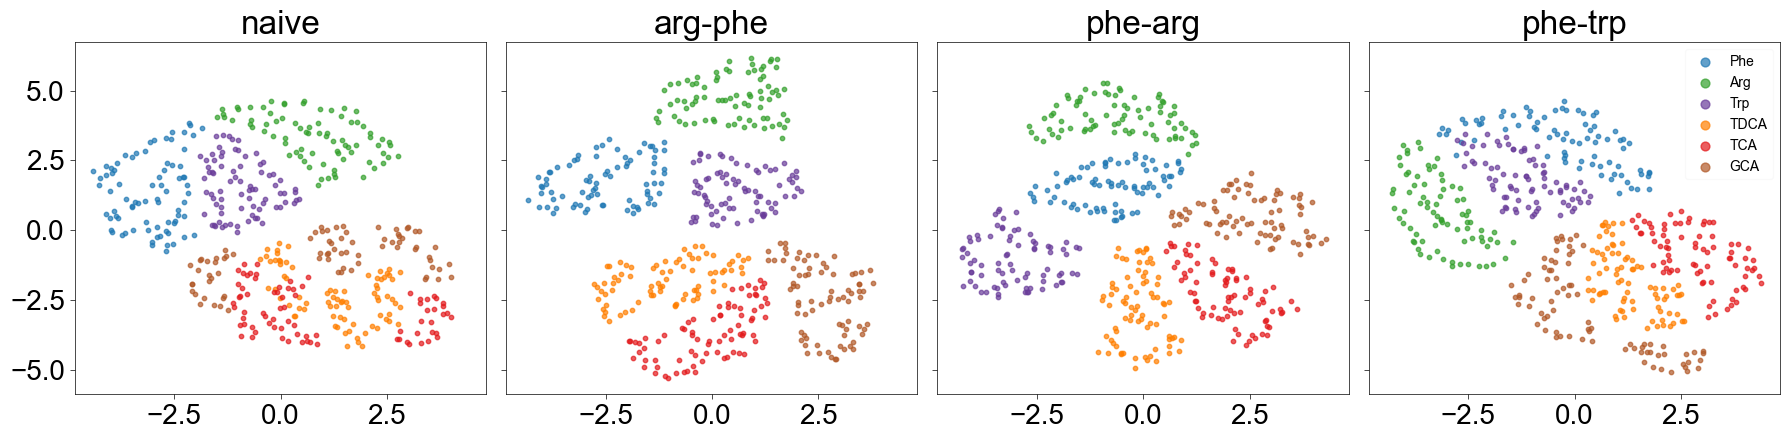

In [14]:
import catrace.visualize as catvis
importlib.reload(catdr)
component_idx = (0, 1)
clr_cycle = ['#1f78b4', '#33a02c', '#6a3d9a', '#ff7f00', '#e31a1c', '#b15928']
markers = ['o'] * 6
col_idxs = aligned_latent_df.columns.get_level_values('condition').isin(['naive', 'arg-phe', 'phe-arg', 'phe-trp'])
sub_aligned_latent_df = aligned_latent_df.loc[:, col_idxs]
fig, axes = plot_conds(sub_aligned_latent_df, catdr.plot_embed_2d, sharex=True, sharey=True, component_idx=component_idx, manifold_level='odor',
                       clr_cycle=clr_cycle,
                       figsize=(9*2,4.5),
                       ncol=4,
                       markers=markers, marker_size=10,
                       plot_type='scatter')
ax = axes[-1]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::3], labels[::3], framealpha=0.1, markerscale=2)
plt.tight_layout()
#fig.savefig(pjoin(dsconfig.fig_dir, f'{ensemble_name}_umap_aligned_2d.pdf'))

# Get the x and y lim of the plot
xlims = ax.get_xlim()
ylims = ax.get_ylim()

# Save figure
from catrace.for_paper import save_figure_for_paper
save_figure_for_paper(fig, 'umap_aligned', fig_dir)

In [15]:
from catrace.dimensionality_reduction import get_pca_axes_points
conditions = dsconfig.conditions
odors = dsconfig.odors_stimuli

axes_points_dfs = []
for condition in conditions:
    cond_df = all_traces_df.T.xs(condition, level='condition')
    axes_points_list = []
    for odor in odors:
        odor_df = cond_df.T.xs(odor, level='odor').T
        _, axes_points = get_pca_axes_points(odor_df.T)
        axes_points_list.append(axes_points)
    # Concatenate axes points for all odors
    axes_points_df = pd.concat(axes_points_list, keys=odors, names=['odor'])
    axes_points_dfs.append(axes_points_df)

In [16]:
# Transform axes_points with umap_model and aligned_model
def transform_axes_points(axes_points, umap_model, centering_model, aligned_model):
    umap_axes_points = umap_model.transform(axes_points)
    if centering_model is None:
        centered_points = umap_axes_points
    else:
        centered_points = centering_model.transform(umap_axes_points)
    if aligned_model is None:
        transformed_points = centered_points
    else:
        transformed_points = aligned_model.transform(centered_points)
    transformed_df = pd.DataFrame(transformed_points, index=axes_points.index)
    return transformed_df

transformed_dfs = []
for idx, condition in enumerate(conditions):
    axes_points = axes_points_dfs[idx]
    umap_model = umap_models[condition]
    centering_model = centering_models[condition]
    aligned_model = aligned_models[condition]
    transformed_df = transform_axes_points(axes_points, umap_model, centering_model, aligned_model)
    transformed_dfs.append(transformed_df)

# Concatenate aligned_umap_axes_points for all conditions
transformed_df = pd.concat(transformed_dfs, keys=conditions, names=['condition'], axis=1)
transformed_df


condition                 naive             arg-phe             phe-arg  \
                              0         1         0         1         0   
odor                                                                      
Phe  center           -3.218086  0.345875 -2.748161  0.299524 -0.145947   
     center_plus_pc1  -3.110113  2.032283 -2.985941  2.243203 -1.062411   
     center_minus_pc1 -2.955479 -0.963620 -2.640575  0.268904  0.370159   
     center_plus_pc2  -2.808561  0.632190 -2.862121  0.255723 -0.266434   
     center_minus_pc2 -4.208882  1.228505 -2.111770  0.402301 -0.075253   
Arg  center            1.457758  3.135978  1.957803  4.683471  0.494671   
     center_plus_pc1   0.281838  3.980532 -0.977970  5.078132 -1.064708   
     center_minus_pc1  1.672514  1.718802  2.240907  4.888469  1.505308   
     center_plus_pc2   1.921905  3.438745  2.051291  4.520776  1.156244   
     center_minus_pc2  1.049055  2.529722  0.502116  5.791458 -0.062527   
Trp  center           -0.337226  0.502613  1.946362  0.643760 -2.970335   
     center_plus_pc1  -0.774593  1.783036  1.105541  1.558772 -3.734703   
     center_minus_pc1 -0.940279 -0.154010  0.811756 -0.246504 -2.021137   
     center_plus_pc2  -0.888414  0.382549  0.559064  0.196659 -3.118327   
     center_minus_pc2 -0.011113  0.480027  1.950432  0.910042 -2.171993   
TDCA center            1.162359 -1.672220 -1.329438 -0.844976 -1.242045   
     center_plus_pc1   1.988167 -2.692674 -1.535115 -1.273908 -1.049090   
     center_minus_pc1  0.720347 -1.450705  0.432439 -1.457334 -0.490421   
     center_plus_pc2   0.802329 -1.919903 -0.549764 -1.741474  0.041199   
     center_minus_pc2  1.360798 -1.583386 -1.275850 -0.770830 -1.169603   
TCA  center           -0.451444 -4.148812  1.060842 -4.394542  2.833881   
     center_plus_pc1   2.095835 -4.320917  0.160581 -5.089545  2.720320   
     center_minus_pc1 -1.198659 -1.903118  1.404677 -3.503595  1.172103   
     center_plus_pc2  -0.399639 -4.259586  1.160950 -3.710247  2.619295   
     center_minus_pc2  0.695091 -1.838337  1.032244 -4.597301  2.791510   
GCA  center            1.734658  0.295887  3.275103 -0.922026  2.219030   
     center_plus_pc1   2.195295 -0.767537  2.742000 -2.977889  3.458300   
     center_minus_pc1 -1.317939 -1.812836  2.841302 -0.612982  1.603209   
     center_plus_pc2   0.283504 -0.596937  3.218689 -0.923955  2.873217   
     center_minus_pc2  1.937066  0.407407  2.141459 -2.125848  1.679630   

condition                         phe-trp            
                              1         0         1  
odor                                                 
Phe  center            1.057984  1.391920  3.391628  
     center_plus_pc1   1.306183 -0.342173  3.958120  
     center_minus_pc1  0.985198  1.629217  2.526835  
     center_plus_pc2   2.215367  1.451323  2.774953  
     center_minus_pc2  1.011840  0.965139  4.200180  
Arg  center            5.090568 -3.003335 -0.287162  
     center_plus_pc1   4.500533 -4.453143  1.216303  
     center_minus_pc1  3.790781 -1.475604 -0.463634  
     center_plus_pc2   4.181122 -3.359480 -0.152289  
     center_minus_pc2  5.270555 -2.379769  1.188446  
Trp  center           -2.502638 -0.461528  1.976813  
     center_plus_pc1  -0.925771 -1.568653  2.075185  
     center_minus_pc1 -2.574836 -0.097855  0.433450  
     center_plus_pc2  -2.559698 -0.571386  0.756181  
     center_minus_pc2 -1.397875 -0.433849  2.207525  
TDCA center           -2.923431  1.137140 -0.841249  
     center_plus_pc1  -3.317505  1.422547 -2.477116  
     center_minus_pc1 -1.417802  1.211960 -0.311783  
     center_plus_pc2  -2.033189  0.924897 -1.338749  
     center_minus_pc2 -3.083942  1.569277 -0.756049  
TCA  center           -1.730872  3.403031  0.437446  
     center_plus_pc1  -2.917462  4.200549 -0.425423  
     center_minus_pc1 -1.662293  2.272849  0.727039  
     center_plus_pc2  -1.491202  2.682759  0.541982  
     center_minus_pc2 -1.528698  3.590322  0.296642  
GCA  center 

In [17]:
def plot_pc_axes_embed_2d(
    embeddf,
    component_idx,
    ax=None,
    manifold_level='manifold', 
    clr_cycle=None,
):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()

    manifold_names = embeddf.index.unique(manifold_level).tolist()
    if clr_cycle is None:
        clr_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    embeddf = embeddf.iloc[:, list(component_idx)]
    ax.margins(0.05)  # Optional, just adds 5% padding to the autoscaling
    groups = embeddf.groupby(level=manifold_level)
    for name, group in groups:
        cidx = manifold_names.index(name)
        color = clr_cycle[cidx]

        # The row indices within the group are center, center_plus_pc1, center_minus_pc1,
        # center_plus_pc2, center_minus_pc2
        # Get center by row index name
        scaling = 1
        center = group.xs('center', level=1).to_numpy().flatten()
        center_plus_pc1 = group.xs('center_plus_pc1', level=1).to_numpy().flatten() * scaling
        center_minus_pc1 = group.xs('center_minus_pc1', level=1).to_numpy().flatten() * scaling
        center_plus_pc2 = group.xs('center_plus_pc2', level=1).to_numpy().flatten() * scaling
        center_minus_pc2 = group.xs('center_minus_pc2', level=1).to_numpy().flatten() * scaling

        # Plot vectors 
        end_points = [
            center_plus_pc1,
            center_minus_pc1,
            center_plus_pc2,
            center_minus_pc2,
        ]
        for end_point in end_points:
            ax.plot(
                [center[0], end_point[0]],
                [center[1], end_point[1]],
                '-', color=color, linewidth=2
            )
        ax.plot(center[0], center[1], 'o', color=color, markersize=12, markeredgecolor='k', label=name)

        # # Plot a polygon with corners at the end points
        # polygon_points = np.array(end_points + [end_points[0]])
        # ax.plot(polygon_points[:, 0], polygon_points[:, 1], '--', color=color, linewidth=1)
        # # Fill polygon with alpha=0.7
        # ax.fill(polygon_points[:, 0], polygon_points[:, 1], color=color, alpha=0.1)

        # For every pair of end points, plot a polygon with corners at center and each of the pair of end points
        for i in range(len(end_points)):
            for j in range(i+1, len(end_points)):
                pair_points = np.array([center, end_points[i], end_points[j], center])
                ax.plot(pair_points[:, 0], pair_points[:, 1], ':', color=color, linewidth=1)
                ax.fill(pair_points[:, 0], pair_points[:, 1], color=color, alpha=0.05)

    return fig, ax

/tmp/ipykernel_897189/3199819127.py:9: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  for idx, (name, group) in enumerate(df.groupby(level='condition', axis=1, sort=False)):


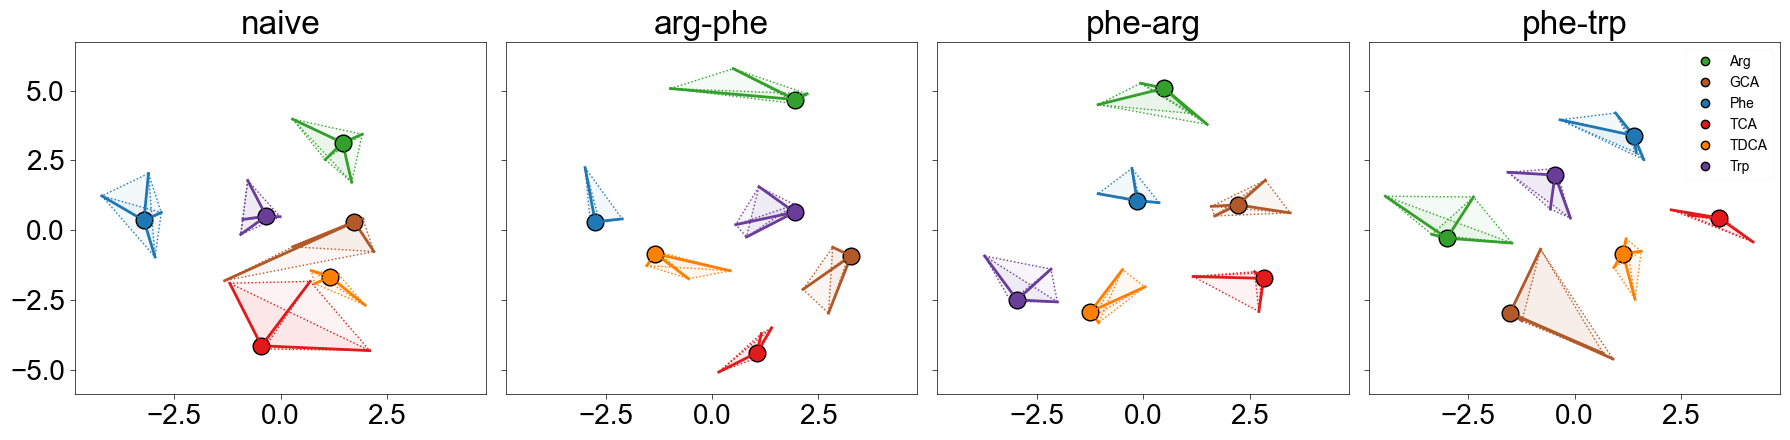

In [18]:
import catrace.visualize as catvis
importlib.reload(catdr)
component_idx = (0, 1)
clr_cycle = ['#1f78b4', '#33a02c', '#6a3d9a', '#ff7f00', '#e31a1c', '#b15928']
markers = ['o'] * 6
fig, axes = plot_conds(transformed_df, plot_pc_axes_embed_2d, sharex=True, sharey=True, component_idx=component_idx, manifold_level='odor',
                       clr_cycle=clr_cycle,
                       figsize=(9*2,4.5),
                       ncol=4,
)
ax = axes[-1]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, framealpha=0.1, markerscale=0.5)
#fig.savefig(pjoin(dsconfig.fig_dir, f'{ensemble_name}_umap_aligned_2d.pdf'))

# Set the x and y lim of the plot
ax.set_xlim(xlims)
ax.set_ylim(ylims)
plt.tight_layout()

# Save figure as pdf, svg, eps
save_figure_for_paper(fig, 'umap_aligned_with_first2_pca_axes', fig_dir)
